In [1]:
import os
import struct
import numpy as np

In [12]:
def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    labels_path = os.path.join(path,
                              '%s-labels-idx1-ubyte'
                              % kind)
    images_path = os.path.join(path,
                              '%s-images-idx3-ubyte'
                              % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                lbpath.read(8))
        labels = np.fromfile(lbpath,
                            dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                              imgpath.read(16))
        images = np.fromfile(imgpath,
                            dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

In [15]:
# read in training data
X_train, y_train = load_mnist('mnist', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

# read in test data
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


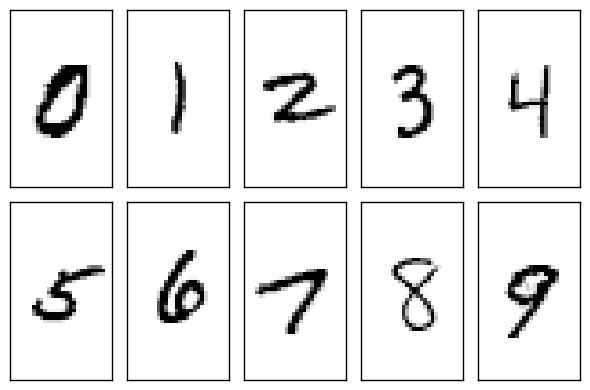

In [20]:
# visualize dataset
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][10].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

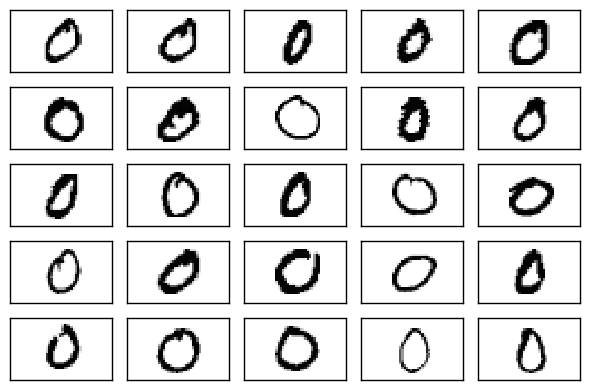

In [25]:
# visualize handwriting differences for a given digit
fig, ax = plt.subplots(nrows=5,
                      ncols=5,
                      sharex=True,
                      sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 0][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [30]:
# train multi layer perceptron
from neuralnet import NeuralNetMLP

nn = NeuralNetMLP(n_output=10,
                 n_features=X_train.shape[1],
                 n_hidden=50,
                 l2=0.1,
                 l1=0.0,
                 epochs=1000,
                 eta=0.001,
                 alpha=0.001,
                 decrease_const=0.00001,
                 shuffle=True,
                 minibatches=50,
                 random_state=1)
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

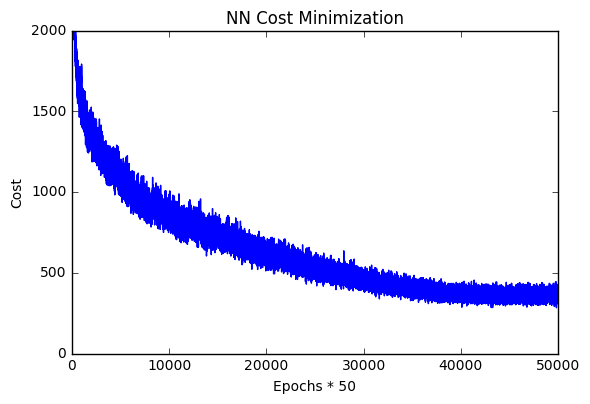

In [32]:
# visualize minimization of cost function
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.title('NN Cost Minimization')
plt.show()

In [34]:
# accuracy
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Training accuracy: 97.75%
Test accuracy: 95.81%


I think this is a 8!


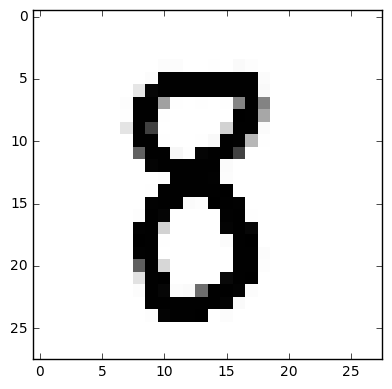

In [135]:
# experiment with grabbing the image from pygame
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray

# read in image
screenshot = io.imread("screenshot.jpeg")
screenshot_resized = resize(screenshot, (28, 28), mode='reflect')
io.imshow(screenshot_resized)
screenshot_gray = rgb2gray(screenshot_resized)
screenshot_resized[:,:,0].shape
screenshot_bw = (screenshot_gray < screenshot_gray.mean())*255

input_screenshot = screenshot_bw.reshape(1, 784)
prediction = nn.predict(input_screenshot)
print("I think this is a " + str(prediction[0]) + "!")